In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [178]:
# Set up colors that will be used in later graphs.
colors = plt.get_cmap('inferno')
colors = colors(np.arange(0, 1, 1/7))*.9 + .1

# Answers for organizing responses and ticks for graphs.
q1 = ['Chara is not in Deltarune at all', 'Kris is Chara in the Deltarune universe',
      'Chara is in Deltarune, but as an entity separate from Kris and the narrator',
      'Chara is the narrator in Deltarune', 'Chara is possessing/controlling Kris',
      'Unsure/No opinion', 'Other theory (Type in the comments)']
t1 = ['Chara is not in DR\nat all', 'Kris is Chara',
      'Chara is in DR, but\nis separate from Kris\nand the Narrator',
      'Chara is the narrator', 'Chara is possessing Kris',
      'No opinion', 'Other theory']
t2 = ['No opinion', 'Completely evil', 'Somewhat evil', 'Neutral', 'Somewhat good', 'Completely good']
t3 = ['No opinion', 'Evil', 'Neutral', 'Good']

# Load and prepare data.
df = pd.read_csv('Do you think Chara is in Deltarune.csv').iloc[:,1:]
df.iloc[:,0] = df.iloc[:,0].map(lambda x: q1.index(x))
df.iloc[:,1] = df.iloc[:,1].map(lambda x: 0 if x[0] == 'X' else int(x[0]))
df['Morality'] = df.iloc[:,1].map({0:0, 1:1, 2:1, 3:2, 4:3, 5:3})

df.head()

,Do you think Chara is in Deltarune?,What do you think of Chara's morality?,Morality
0,0,3,2
1,0,1,1
2,5,1,1
3,1,3,2
4,4,1,1


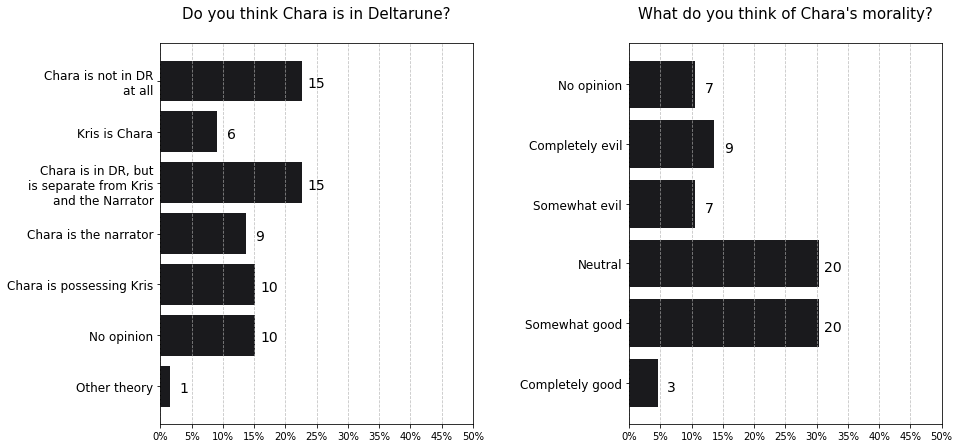

In [179]:
# Function that labels the rectangles according to their width.
def autolabel(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(width,
                    xy=(width+1.5, rect.get_y()+1-rect.get_height()/2),
                    xytext=(0, 1), textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

x = np.unique(df.iloc[:,0], return_counts=True)[1]
bars = ax[0].barh(range(7), x, color=colors[0])
ax[0].set_xlim(0, x.sum()/2)
ax[0].set_xticks(np.arange(0, x.sum()/2+.1, x.sum()/20))
ax[0].set_xticklabels(['{}%'.format(i) for i in range(0, 51, 5)])
ax[0].set_yticks(range(7))
ax[0].set_yticklabels(t1, fontsize=12)
ax[0].invert_yaxis()
ax[0].grid(axis='x', linestyle='--', alpha=.75)
ax[0].set_title('Do you think Chara is in Deltarune?', y=1.05, fontsize=15)
autolabel(bars, ax[0])

x = np.unique(df.iloc[:,1], return_counts=True)[1]
bars = ax[1].barh(range(6), x, color=colors[0])
ax[1].set_xlim(0, x.sum()/2)
ax[1].set_xticks(np.arange(0, x.sum()/2+.1, x.sum()/20))
ax[1].set_xticklabels(['{}%'.format(i) for i in range(0, 51, 5)])
ax[1].set_yticks(range(6))
ax[1].set_yticklabels(t2, fontsize=12)
ax[1].invert_yaxis()
ax[1].grid(axis='x', linestyle='--', alpha=.75)
ax[1].set_title('What do you think of Chara\'s morality?', y=1.05, fontsize=15)
autolabel(bars, ax[1])

plt.subplots_adjust(wspace=.5)
plt.show()

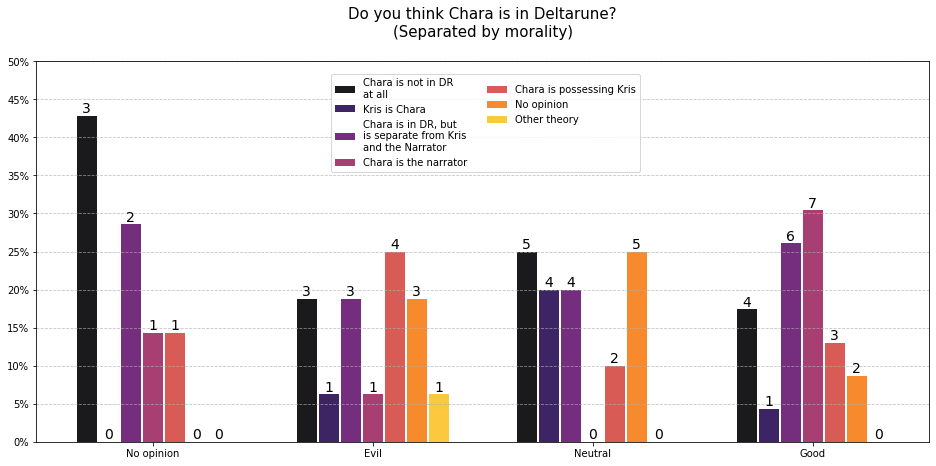

In [182]:
# This time it works a bit differently.
def autolabel(rects, labels, ax):
    for i, rect in enumerate(rects):
        x, width, height = rect.get_x(), rect.get_width(), rect.get_height()
        ax.annotate(labels[i],
                    xy=(x+width/2, height),
                    xytext=(0, 0), textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

fig, ax = plt.subplots(figsize=(16, 7))

for i, t in enumerate(t3):
    data = df.loc[np.where(df['Morality'] == i)] # Filter specific morality group.
    height = [len(np.where(data.iloc[:,0] == i)[0]) for i in range(7)]
    rects = ax.bar(np.arange(0, .7, .1)-2.1+i, height/np.sum(height), width=.09, color=colors)
    autolabel(rects, height, ax)

ax.set_xticks(np.arange(-1.8, 1.3, 1))
ax.set_xticklabels(t3)
ax.set_ylim(0, .5)
ax.set_yticks(np.arange(0, .51, .05))
ax.set_yticklabels(['{}%'.format(i) for i in range(0, 51, 5)])
ax.legend(rects, t1, loc=(.33, .71), ncol=2)
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.set_title('Do you think Chara is in Deltarune?\n(Separated by morality)', y=1.05, fontsize=15)
    
plt.show()